<a href="https://colab.research.google.com/github/ssshhhubh/object_detection_AMD/blob/master/AMD_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
path2data="/content/drive/My Drive/obj_detection/"
path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")
# make sure to install xlrd
labels_df=pd.read_excel(path2labels,index_col="ID")
labels_df.head(1)

,imgName,Fovea_X,Fovea_Y
ID,,,
1,A0001.jpg,1182.264278,1022.018842


In [0]:
id=labels_df.index

In [0]:
len(id)

398

In [0]:
labels_df.tail()

,imgName,Fovea_X,Fovea_Y
ID,,,
396,N0307.jpg,823.024991,690.210211
397,N0308.jpg,647.598978,795.653188
398,N0309.jpg,624.571803,755.694880
399,N0310.jpg,687.523044,830.449187
400,N0311.jpg,746.107631,759.623062


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


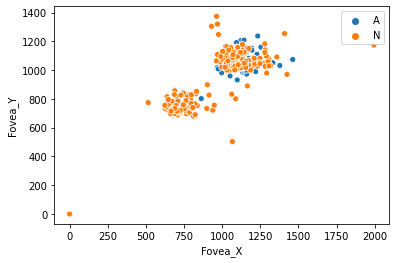

In [0]:
#we will show the scatter plot of the Fovea_X and Fovea_Y coordinates:
import seaborn as sns
%matplotlib inline
AorN=[imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'],
y=labels_df['Fovea_Y'],hue=AorN)

In [0]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# fix random seed
np.random.seed(2019)

In [0]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows,ncols=2,3


<Figure size 1080x648 with 0 Axes>

In [0]:
#Then, we will select a random set of image ids:
imgName=labels_df["imgName"]
ids=labels_df.index
rndIds=np.random.choice(ids,nrows*ncols)
print(rndIds)

[ 75 373 162 296 219 193]


In [0]:
def load_img_label(labels_df,id_):
    imgName=labels_df["imgName"]
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]
    label=(x,y)
    return img,label

In [0]:
def show_img_label(img,label,w_h=(50,50),thickness=2):
    w,h=w_h
    cx,cy=label
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="green",width=thickness)
    plt.imshow(np.asarray(img))

(2124, 2056) (1172.97048128342, 1082.46385026738)
(1444, 1444) (802.729556611839, 734.550832458648)
(1444, 1444) (762.541537279049, 808.185683889582)
(2124, 2056) (1231.98866983552, 1027.92523301505)
(2124, 2056) (1019.93326509295, 1044.24177285545)
(2124, 2056) (1108.25889969404, 1040.93232020263)


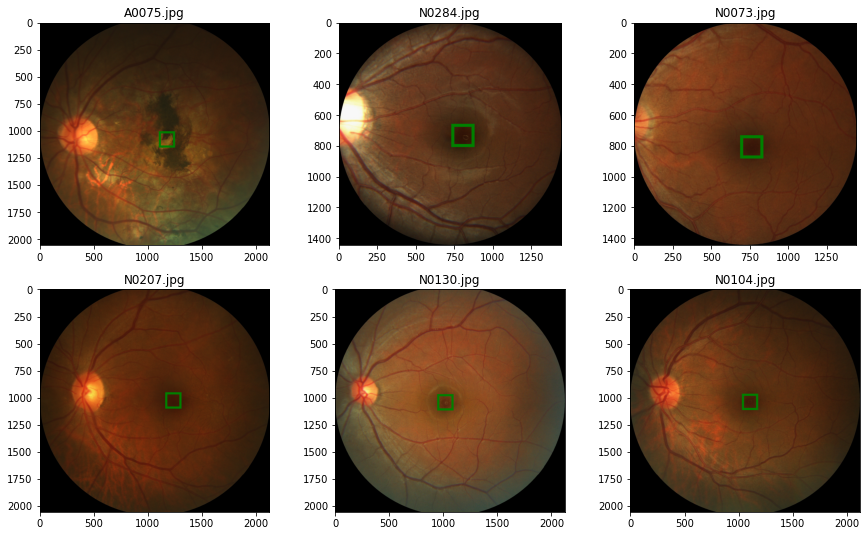

In [0]:
for i,id_ in enumerate(rndIds):
    img,label=load_img_label(labels_df,id_)
    print(img.size,label)
    plt.subplot(nrows, ncols, i+1)
    show_img_label(img,label,w_h=(150,150),thickness=20)
    plt.title(imgName[id_])

In [0]:
#we will collect the image widths and heights in two lists:
h_list,w_list=[],[]
for id_ in ids:
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    #load imgage
    img = Image.open(fullPath2img)
    h,w=img.size
    h_list.append(h)
    w_list.append(w)


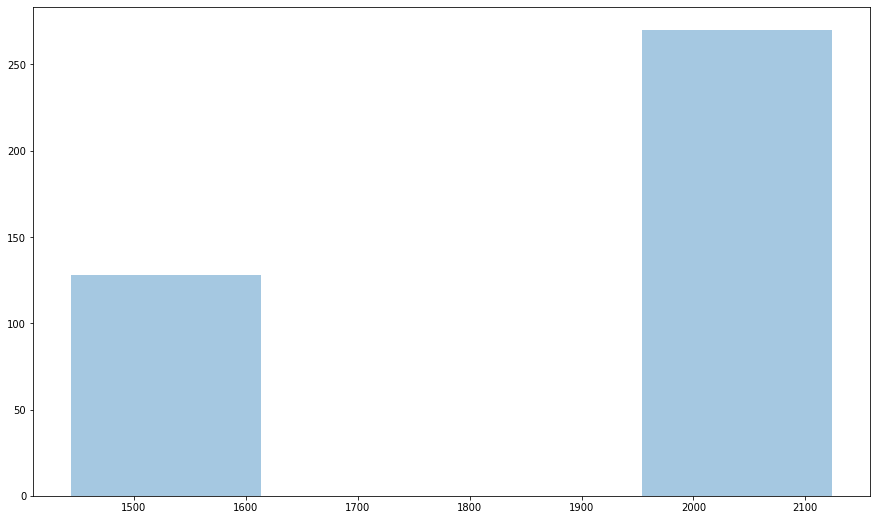

In [0]:
sns.distplot(a=h_list, kde=False)

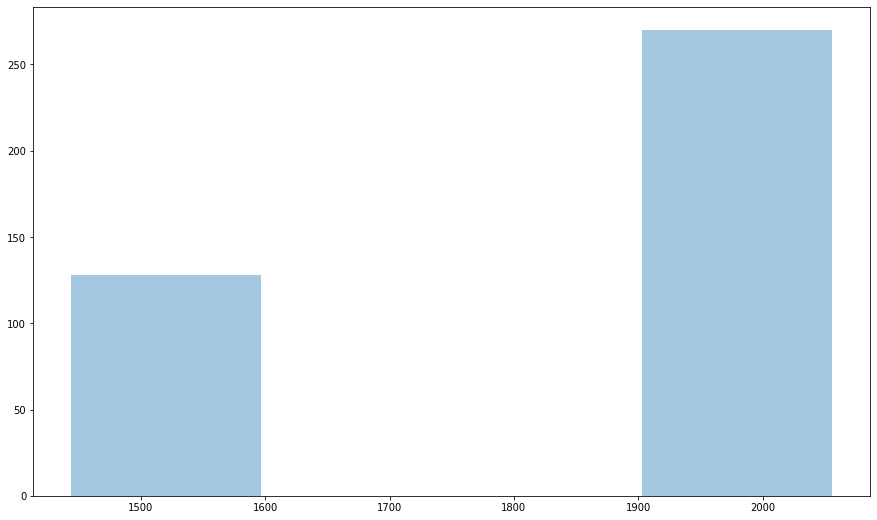

In [0]:
sns.distplot(a=w_list, kde=False)

In [0]:
import torchvision.transforms.functional as TF

In [0]:
def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
    w_orig,h_orig = image.size
    w_target,h_target = target_size
    cx, cy= label
    # resize image and label
    image_new = TF.resize(image,target_size)
    label_new= cx/w_orig*w_target, cy/h_orig*h_target
    return image_new,label_new

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


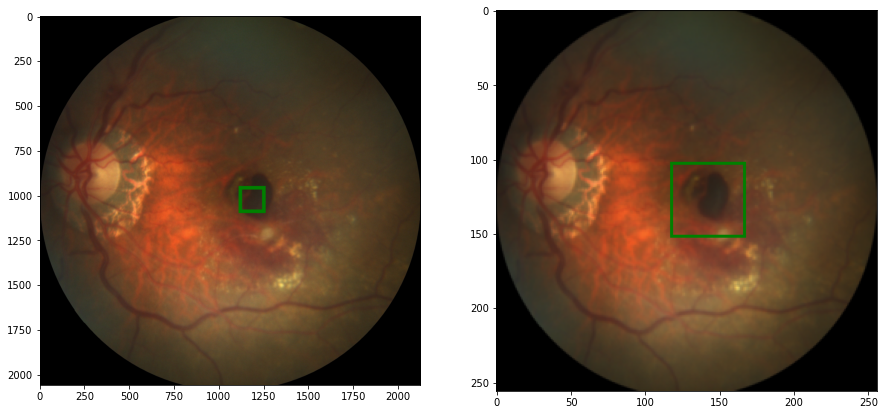

In [0]:
img, label=load_img_label(labels_df,1)
print(img.size,label)

img_r,label_r=resize_img_label(img,label)
print(img_r.size,label_r)

plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(img_r,label_r)

In [0]:
def random_hflip(image,label):
  w,h=image.size  
  x,y=label
  image = TF.hflip(image)
  label = w-x, y
  return image,label

(2124, 2056) (1182.26427759023, 1022.01884158854)


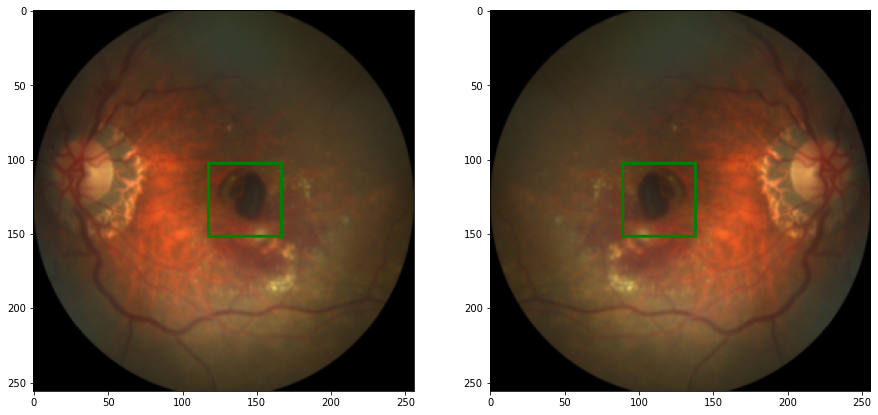

In [0]:
img, label=load_img_label(labels_df,1)
print(img.size,label)

img_r,label_r=resize_img_label(img,label)
img_fh,label_fh=random_hflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fh,label_fh)

In [0]:
def random_vflip(image,label):
    w,h=image.size
    x,y=label
    image = TF.vflip(image)
    label = x, w-y
    return image, label

<class 'PIL.JpegImagePlugin.JpegImageFile'>


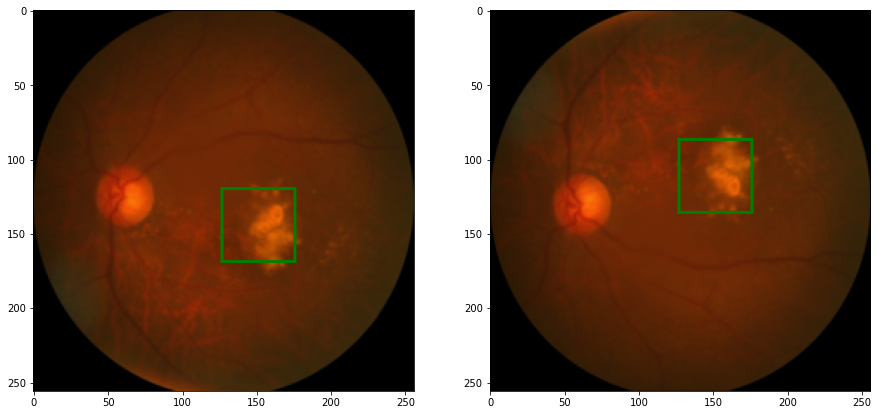

In [0]:
img, label=load_img_label(labels_df,7)
img_r,label_r=resize_img_label(img,label)
img_fv,label_fv=random_vflip(img_r,label_r)
print(type(img))

plt.subplot(1,2,1)
show_img_label(img_r,label_r)

plt.subplot(1,2,2)
show_img_label(img_fv,label_fv)

In [0]:
import numpy as np
np.random.seed(1)

In [0]:
def random_shift(image,label,max_translate=(0.2,0.2)):
    w,h=image.size
    max_t_w, max_t_h=max_translate
    cx, cy=label
    trans_coef=np.random.rand()*2-1
    w_t = int(trans_coef*max_t_w*w)
    h_t = int(trans_coef*max_t_h*h)
    image=TF.affine(image,translate=(w_t,h_t),shear=0,angle=0,scale=1)
    label = cx+w_t, cy+h_t
    return image,label

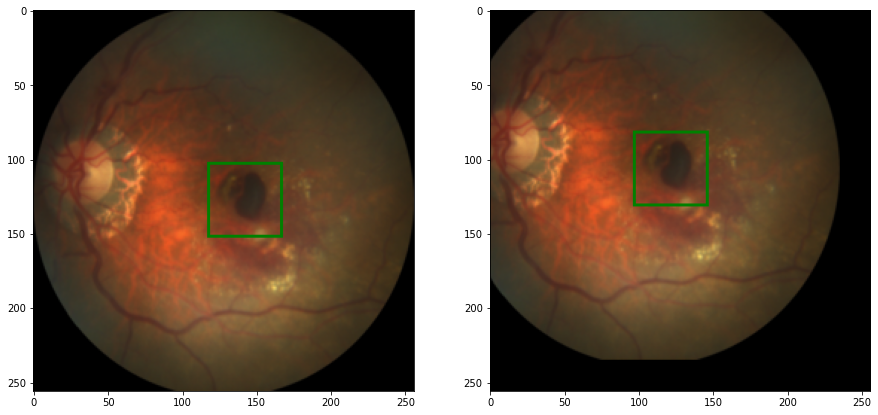

In [0]:
img, label=load_img_label(labels_df,1)
img_r,label_r=resize_img_label(img,label)
img_t,label_t=random_shift(img_r,label_r,max_translate=(.5,.5))

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

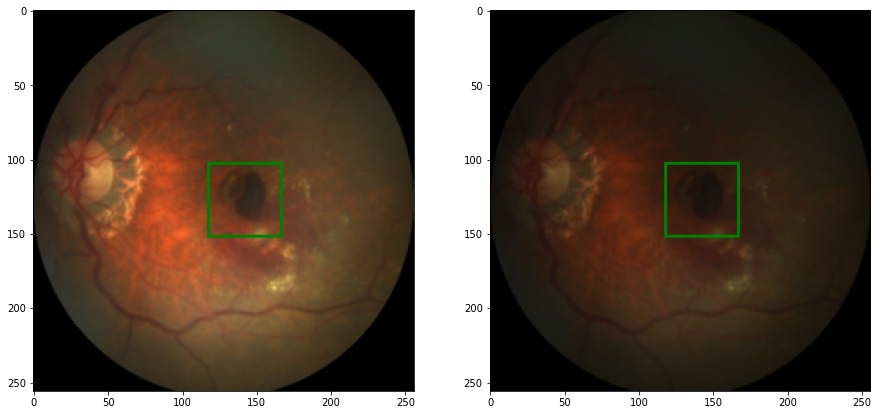

In [0]:
img, label=load_img_label(labels_df,1)
# resize image and label
img_r,label_r=resize_img_label(img,label)
# adjust brightness
img_t=TF.adjust_brightness(img_r,brightness_factor=0.5)
label_t=label_r
plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [0]:
#integrate these transformations into the transformer function
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])

    if random.random() < params["p_brightness"]:
        brightness_factor=1+(np.random.rand()*2-1)*params["brightness_factor"]
        image=TF.adjust_brightness(image,brightness_factor)

    if random.random() < params["p_contrast"]:
        contrast_factor=1+(np.random.rand()*2-1)*params["contrast_factor"]
        image=TF.adjust_contrast(image,contrast_factor)

    if random.random() < params["p_gamma"]:
        gamma=1+(np.random.rand()*2-1)*params["gamma"]
        image=TF.adjust_gamma(image,gamma)

    if params["scale_label"]:
        label=scale_label(label,params["target_size"])
        
    image=TF.to_tensor(image)
    return image, label


In [0]:
import random
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)

In [0]:
params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma": 0.4,
    "scale_label": False,
}
img_t,label_t=transformer(img,label,params)

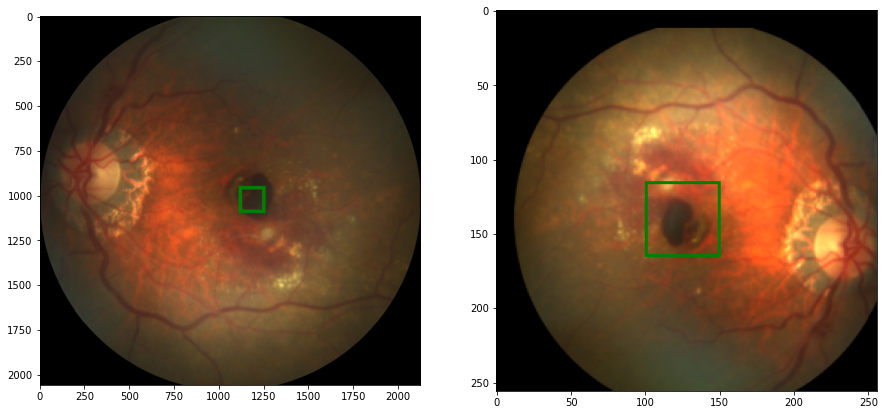

In [0]:

plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

In [0]:

def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

In [0]:

def scale_label(a,b):
    div = [ai/bi for ai,bi in zip(a,b)]
    return div


#**Creating custom dataset**

In [0]:
from torch.utils.data import Dataset
from PIL import Image

In [0]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):      
        pass    
      
    def __len__(self):
        # return size of dataset
        return len(self.labels)
      
    def __getitem__(self, idx):
        pass

In [0]:
def __init__(self, path2data, transform, trans_params):      

    # full path of the labels file
    path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")

    # read and extract labels
    labels_df=pd.read_excel(path2labels,index_col="ID")
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values

    # extract ID and imgName columns
    self.imgName=labels_df["imgName"]
    self.ids=labels_df.index

    self.fullPath2img=[0]*400
    print(len(self.fullPath2img))
    for id_ in self.ids:
        if self.imgName[id_][0]=="A":
            prefix="AMD"
        else:
            prefix="Non-AMD"
        self.fullPath2img[id_-1]=os.path.join(path2data,"Training400",prefix,self.imgName[id_])
    self.fullPath2img.pop(11)
    self.fullPath2img.pop(11)

    self.transform = transform
    self.trans_params=trans_params

In [0]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])  
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

In [0]:
#Then, we will override the dataset class functions:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [0]:
trans_params_train={
    "target_size" : (256, 256),
    "p_hflip" : 0.5,
    "p_vflip" : 0.5,
    "p_shift" : 0.5,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.5,
    "brightness_factor": 0.2,
    "p_contrast": 0.5,
    "contrast_factor": 0.2,
    "p_gamma": 0.5,
    "gamma": 0.2,
    "scale_label": True,    
}

In [0]:
trans_params_val={
    "target_size" : (256, 256),
    "p_hflip" : 0.0,
    "p_vflip" : 0.0,
    "p_shift" : 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,    
}

In [0]:
amd_ds1=AMD_dataset(path2data,transformer,trans_params_train)
amd_ds2=AMD_dataset(path2data,transformer,trans_params_val)

400
400


In [0]:
type(amd_ds1)

__main__.AMD_dataset

In [0]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))


318
----------
80


In [0]:
from torch.utils.data import Subset

train_ds=Subset(amd_ds1,train_index)
print(len(train_ds))

val_ds=Subset(amd_ds2,val_index)
print(len(val_ds))

318
80


In [0]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fix random seed
np.random.seed(0)

In [0]:
def show(img,label=None):
    npimg = img.numpy().transpose((1,2,0))
    plt.imshow(npimg)
    if label is not None:
        label=rescale_label(label,img.shape[1:])        
        x,y=label
        plt.plot(x,y,'b+',markersize=20)

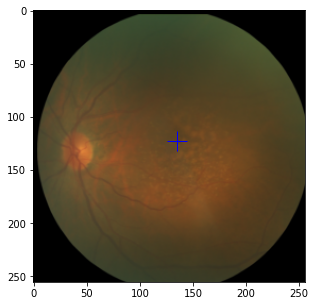

In [0]:

plt.figure(figsize=(5,5))
for img,label in train_ds:
    show(img,label)
    break

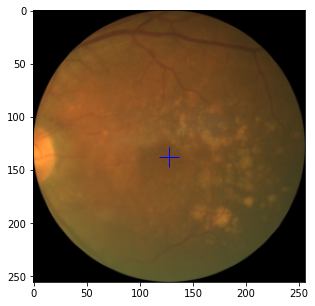

In [0]:
plt.figure(figsize=(5,5))
for img,label in val_ds:
    show(img,label)
    break


In [0]:
#Next, we will define two data loaders for the training and validation datasets:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [0]:
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(label_b)
    break

torch.Size([8, 3, 256, 256]) torch.float32
[tensor([0.5824, 0.4970, 0.5285, 0.5310, 0.6845, 0.5410, 0.5401, 0.5010]), tensor([0.6275, 0.5156, 0.5377, 0.4562, 0.6370, 0.4905, 0.5884, 0.5043])]


In [0]:
#that the label batch is returned as a list. Thus, we will need to convert thelist to a tensor
import torch
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)


    # convert list to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break


torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [0]:
for img_b, label_b in val_dl:
    print(img_b.shape,img_b.dtype)
    # convert to tensor
    label_b=torch.stack(label_b,1)
    #label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32


#**Creating the model**

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()
    def forward(self, x):
        return x

In [0]:
def __init__(self, params):
    super(Net, self).__init__()
    C_in,H_in,W_in=params["input_shape"]
    init_f=params["initial_filters"]
    num_outputs=params["num_outputs"]
    self.conv1 = nn.Conv2d(C_in, init_f,kernel_size=3,stride=2,padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f,kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f,kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f,kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f,kernel_size=3,padding=1)
    self.fc1 = nn.Linear(16*init_f, num_outputs)

In [0]:
def forward(self, x):
    identity=F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)
    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)
    
    x = F.relu(self.conv5(x))
    x=F.adaptive_avg_pool2d(x,1)
    x = x.reshape(x.size(0), -1)
    x = self.fc1(x)
    return x

In [0]:
Net.__init__=__init__
Net.forward=forward

In [0]:
params_model={
"input_shape": (3,256,256),
"initial_filters": 16,
"num_outputs": 2,
}
model = Net(params_model)

In [0]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    model=model.to(device)

In [0]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)


In [0]:
from torchsummary import summary
summary(model,input_size=(3,256,256),device=device.type)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 128, 128]             448
            Conv2d-2           [-1, 32, 64, 64]           5,504
            Conv2d-3           [-1, 64, 32, 32]          29,440
            Conv2d-4          [-1, 128, 16, 16]         132,608
            Conv2d-5            [-1, 256, 8, 8]         560,128
            Linear-6                    [-1, 2]             514
Total params: 728,642
Trainable params: 728,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.75
Forward/backward pass size (MB): 3.88
Params size (MB): 2.78
Estimated Total Size (MB): 7.40
----------------------------------------------------------------


In [0]:
loss_func = nn.SmoothL1Loss(reduction="sum")

In [0]:
#try out the loss with known values:
n,c=8,2
y = 0.5 * torch.ones(n, c, requires_grad=True)
print(y.shape)

target = torch.zeros(n, c, requires_grad=False)
print(target.shape)

loss = loss_func(y, target)
print(loss.item())

y = 2 * torch.ones(n, c, requires_grad=True)
target = torch.zeros(n, c, requires_grad=False)
loss = loss_func(y, target)
print(loss.item())

torch.Size([8, 2])
torch.Size([8, 2])
2.0
24.0


In [0]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

In [0]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


In [0]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [0]:
#we will define a helper function to convert coordinates to a bounding box:

def cxcy2bbox(cxcy,w=50./256,h=50./256):
    # define two new tensors for w and h
    w_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
    h_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*h

    # extract cx and cy
    cx=cxcy[:,0].unsqueeze(1)
    cy=cxcy[:,1].unsqueeze(1)
    
    # concat cx,cy,w and h
    boxes=torch.cat((cx,cy, w_tensor, h_tensor), -1) # cx,cy,w,h
    
    return torch.cat((boxes[:, :2] - boxes[:, 2:]/2, # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:]/2), 1) # xmax, ymax

In [0]:
#example
torch.manual_seed(0)

cxcy=torch.rand(1,2)
print("center:", cxcy*256)

bb=cxcy2bbox(cxcy)
print("bounding box", bb*256)

center: tensor([[127.0417, 196.6648]])
bounding box tensor([[102.0417, 171.6648, 152.0417, 221.6648]])


In [0]:
import torchvision
def metrics_batch(output, target):
    output=cxcy2bbox(output)
    target=cxcy2bbox(target)
    
    iou=torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [0]:
n,c=8,2
target = torch.rand(n, c, device=device)
target=cxcy2bbox(target)
metrics_batch(target,target)

8.0

In [0]:
def loss_batch(loss_func, output, target, opt=None):   
    # get loss 
    loss = loss_func(output, target)
    
    # get performance metric
    metric_b = metrics_batch(output,target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [0]:
for xb,label_b in train_dl:    
    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    label_b=label_b.to(device)
 
    l,m=loss_batch(loss_func,label_b,label_b)
    print(l,m)
    break

0.0 8.0


#**Training and evaluation**

In [0]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # convert to tensor
        yb=torch.stack(yb,1)
        yb=yb.type(torch.float32).to(device)
        
        # get model output
        output=model(xb.to(device))
        
        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        
        # update running loss
        running_loss+=loss_b
        
        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

    # average loss value
    loss=running_loss/float(len_data)
    
    # average metric value
    metric=running_metric/float(len_data)
    
    return loss, metric

In [0]:
import copy
def train_val(model, params):
    # extract parameters
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    # history of loss values in each epoch
    loss_history={
        "train": [],
        "val": [],
    }
    
    # histroy of metric values in each epoch
    metric_history={
        "train": [],
        "val": [],
    }    
    
    
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # initialize best loss to a large value
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        # get current learning rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        # train the model
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # evaluate the model
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
       
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            

        print("train loss: %.6f, accuracy: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, accuracy: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [0]:
loss_func=nn.SmoothL1Loss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= "./models/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights_smoothl1.pt",
}

# train and validate the model
model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/99, current lr=0.0001
Copied best model weights!
train loss: 0.016870, accuracy: 26.44
val loss: 0.027500, accuracy: 24.49
----------
Epoch 1/99, current lr=0.0001
Copied best model weights!
train loss: 0.017980, accuracy: 26.35
val loss: 0.011087, accuracy: 47.41
----------
Epoch 2/99, current lr=0.0001
Copied best model weights!
train loss: 0.009914, accuracy: 36.60
val loss: 0.010621, accuracy: 41.48
----------
Epoch 3/99, current lr=0.0001
Copied best model weights!
train loss: 0.007763, accuracy: 40.58
val loss: 0.008772, accuracy: 56.38
----------
Epoch 4/99, current lr=0.0001
train loss: 0.007558, accuracy: 40.10
val loss: 0.009949, accuracy: 46.98
----------
Epoch 5/99, current lr=0.0001
train loss: 0.007015, accuracy: 39.36
val loss: 0.009646, accuracy: 56.23
----------
Epoch 6/99, current lr=0.0001
train loss: 0.005662, accuracy: 47.18
val loss: 0.009893, accuracy: 52.82
----------
Epoch 7/99, current lr=0.0001
train loss: 0.005381, accuracy: 47.68
val loss: 0.009303,

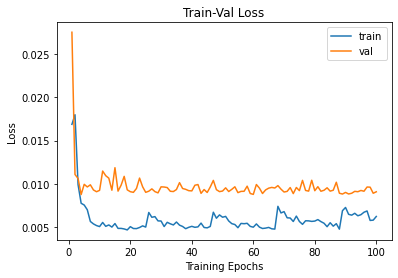

In [0]:
num_epochs=params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

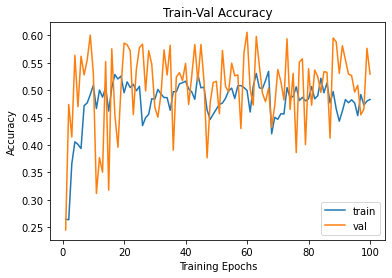

In [0]:
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

#**Deploying the model**

In [0]:
params_model={
          "input_shape": (3,256,256),
          "initial_filters": 16,
          "num_outputs": 2,
          }
model = Net(params_model)
model.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)

In [0]:
model=model.to(device)

In [0]:
path2weights="./models/weights_smoothl1.pt"
model.load_state_dict(torch.load(path2weights))

<All keys matched successfully>

In [0]:
loss_func=nn.SmoothL1Loss(reduction="sum")
with torch.no_grad():
    loss,metric=loss_epoch(model,loss_func,val_dl)
print(loss,metric)

0.008771658572368324 0.5637653350830079


In [0]:
#we will deploy the model on the image samples from val_ds
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F
#np.random.seed(0)
import matplotlib.pylab as plt
%matplotlib inline

In [0]:
def show_tensor_2labels(img,label1,label2,w_h=(50,50)):
    label1=rescale_label(label1,img.shape[1:])
    label2=rescale_label(label2,img.shape[1:])
    img=tv_F.to_pil_image(img)
    w,h=w_h
    cx,cy=label1
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="green",width=2)
    cx,cy=label2
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="red",width=2)
    plt.imshow(np.asarray(img))

In [0]:
rndInds=np.random.randint(len(val_ds),size=10)
print(rndInds)

[73  0 10 43 58 23 59  2 62 35]


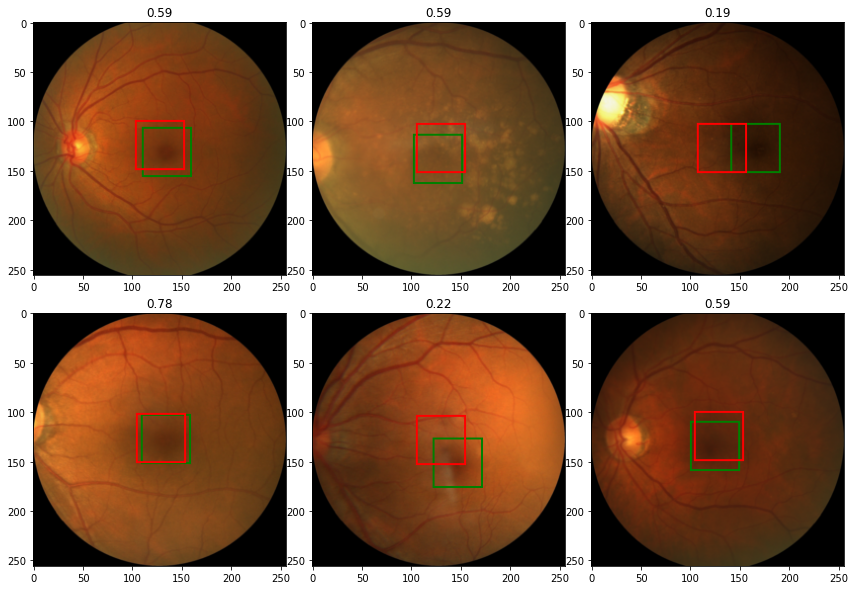

In [0]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplots_adjust(wspace=0.0, hspace=0.15)

for i,rndi in enumerate(rndInds):
    img,label=val_ds[rndi]
    h,w=img.shape[1:]
    with torch.no_grad():
        label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
    plt.subplot(2,3,i+1)
    show_tensor_2labels(img,label,label_pred)
    # calculate IOU
    label_bb=cxcy2bbox(torch.tensor(label).unsqueeze(0))
    label_pred_bb=cxcy2bbox(label_pred.unsqueeze(0))
    iou=torchvision.ops.box_iou(label_bb, label_pred_bb)
    plt.title("%.2f" %iou.item())
    if i>4:
        break

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)
torch.Size([3, 256, 256])


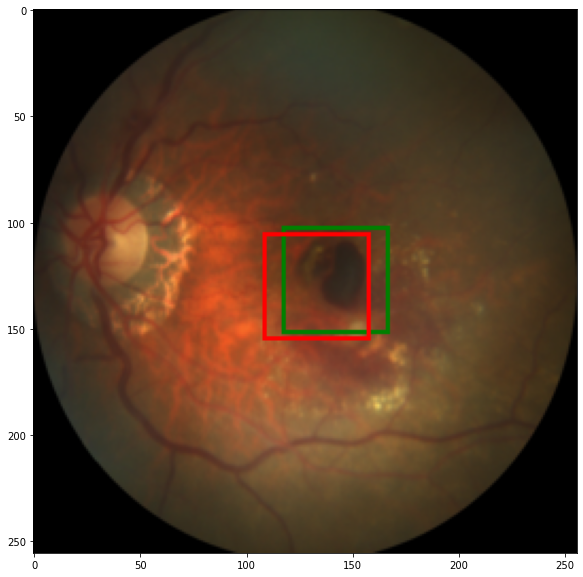

In [0]:
path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")
labels_df=pd.read_excel(path2labels,index_col="ID")
img,label=load_img_label(labels_df,1)
print(img.size, label)
img,label=resize_img_label(img,label,target_size=(256,256))
print(img.size, label)
img=TF.to_tensor(img)
label=scale_label(label,(256,256))
print(img.shape)
with torch.no_grad():
    label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
show_tensor_2labels(img,label,label_pred)